### This analysis is based on the measurement of duration of float-to-float and int-to-int matrix multiplication with the same dimension (100 and 500 are max).
Means and standard deviations are introduced in the lower table.

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# returns the duration of float- or int-matrix multiplication 
def count_matrix(n, par='int'): 
    if par == 'int':
        a = np.random.randint(10, size=(n, n))
    if par == 'float':
        a = np.random.rand(n, n)
    start = time.time()
    res = np.dot(a, a)
    final = time.time()-start
    return round(final, 8)

# returns 2 lists of durations from matrices in range(1 x 1 - m x m)
def timecount(m):
    int_times, times = [], []
    for i in range(1, m):
        times.append(count_matrix(i, par='float'))
        int_times.append(count_matrix(i))
    return int_times, times


# creates dataframes with matrix multiplication working time and statistics
def create_df():
    int100, float100 = timecount(101)
    int500, float500 = timecount(501)
    
    dict_100 = {'speed_int_100': int100,
                 'speed_float_100': float100}
    dict_500 = {'speed_int_500': int500,
                 'speed_float_500': float500}   
    
    means = list(map(np.mean, [int100, float100, int500, float500]))
    stds = list(map(np.std, [int100, float100, int500, float500]))
    df_100 = pd.DataFrame(dict_100, index=range(1,101))
    df_500 = pd.DataFrame(dict_500, index=range(1,501))
    
    statistics = pd.DataFrame([means, stds], index=['mean', 'std'], 
                              columns=['speed_int_100', 
                                'speed_float_100',
                               'speed_int_500',
                               'speed_float_500'])
    
    return df_100, df_500, statistics

In [2]:
def get_and_write():
    random.seed(123)
    df_100, df_500, statistics = create_df()
    names = ['df_100.xlsx', 'df_500.xlsx', 'stat.xlsx']
    for name, data in zip(names, [df_100, df_500, statistics]):
        data.to_excel(name)
    return df_100, df_500, statistics

import os.path

names = ['df_100.xlsx', 'df_500.xlsx', 'stat.xlsx']
d = {}

for name in names:
    if os.path.isfile(name):
        d[name] = pd.read_excel(name)
    else:
        df_100, df_500, statistics = get_and_write()

In [3]:
def visualize(data):
    df_100, df_500, statistics = data
    from pylab import rcParams
    rcParams['figure.figsize'] = 12,8
    
    mean_int_500 = statistics['speed_int_500'].iloc[[0]][0]
    mean_int_100 = statistics['speed_int_100'].iloc[[0]][0]
    tstatistics = statistics.T
    
    plt.subplot(1,2,1)
    plt.plot(range(1, 101), df_100['speed_float_100'], 'r', label='Float (100x100 max)', linewidth=1)
    plt.plot(range(1, 101), df_100['speed_int_100'], 'k', label='Integer (100x100 max)', linewidth=1)
    plt.xlabel('Matrix Dimension')
    plt.ylabel('Seconds')
    plt.annotate('Mean (int)', xy=(56, mean_int_100), xytext=(mean_int_100+10,0.005), size=16, arrowprops=dict(facecolor='black'))
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(range(1, 501), df_500['speed_float_500'], 'r', label='Float (500x500 max)', linewidth=1)
    plt.plot(range(1, 501), df_500['speed_int_500'], 'k', label='Integer (500x500 max)', linewidth=1)
    plt.xlabel('Matrix Dimension')
    plt.ylabel('Seconds')
    plt.annotate('Mean (int)', xy=(330, mean_int_500), xytext=(mean_int_100+140, 0.1), size=16, arrowprops=dict(facecolor='red'))
    plt.legend()
    plt.grid()

    plt.title('Computational complexity of matrix multiplication')
    plt.savefig('result.png')
    plt.show()
    
    print(statistics)
    
    plt.subplot(1,1,1)
    ax = tstatistics['mean'].plot(kind="bar",rot=0,color="blue",fontsize=16, alpha=0.5, yerr=tstatistics['std'])
    ax.set_ylabel('Seconds')
    ax.set_title('Means and standard deviations in matrix multiplication complexity')
    ax.grid()
    plt.show()
    
    

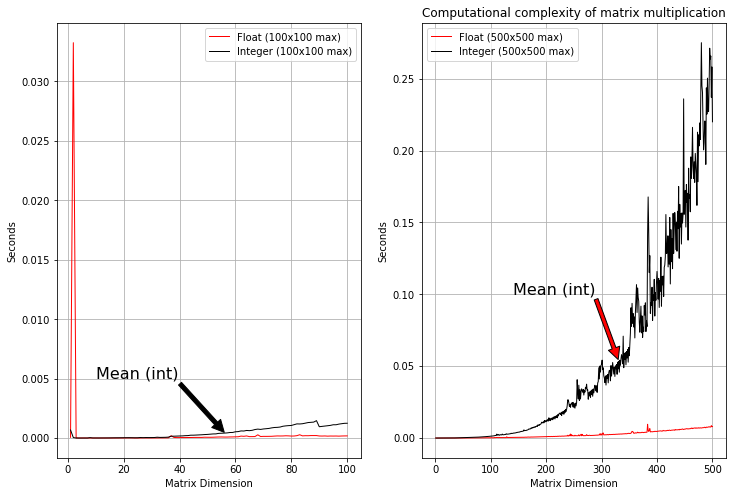

      speed_int_100  speed_float_100  speed_int_500  speed_float_500
mean       0.000493         0.000432       0.054599         0.002389
std        0.000456         0.003299       0.067772         0.002359


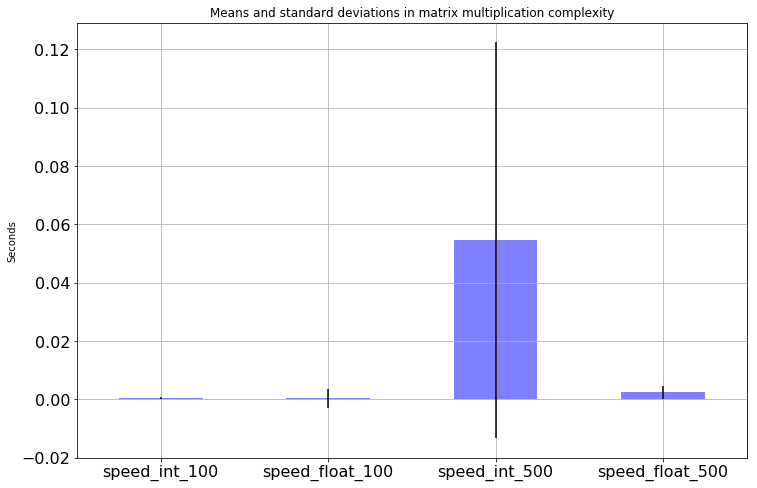

In [4]:
try:
    visualize(d.values())
except ValueError:
    visualize([df_100, df_500, statistics])